In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gold Price Prediction

### 1. Problem Statement

The aim of this project is to develop a robust predictive model for forecasting the price of gold in the near future. Gold, as a valuable commodity, experiences fluctuations influenced by various factors such as economic indicators, geopolitical events, market sentiment, and demand-supply dynamics. Accurately predicting these price movements is crucial for investors, financial institutions, and policymakers to make informed decisions regarding trading strategies, asset allocation, and risk management.

1. Develop and optimize predictive models using the selected techniques, ensuring they capture the complex patterns and dynamics inherent in gold price movements.

2. Validate the predictive models using historical data and evaluate their performance metrics.

3. Continuously monitor and refine the predictive model using updated data to enhance its accuracy and reliability over time.
    
By accomplishing these objectives, the project aims to provide stakeholders with valuable insights and forecasts to navigate the dynamic landscape of gold markets effectively.


### 2. Data Description

This comprehensive dataset offers a decade's worth of insights into gold price trends, spanning from 2013 to 2023. It meticulously captures the daily opening and closing prices, highs and lows, along with trading volume for each day. Such a wealth of information can be instrumental for those seeking to analyze or visualize market dynamics over this ten-year period.
All data was sourced from the authoritative platform: Investing.com Gold Historical Data

Data source: https://www.kaggle.com/datasets/farzadnekouei/gold-price-10-years-20132023

Here's a breakdown of what each column in your dataset represents:

1. **Date**: This column contains the date for each record, indicating the specific day the data was collected. It is typically in a format like `YYYY-MM-DD`.

2. **Price**: This column shows the closing price of gold on that particular date. It represents the final trading price of gold at the end of the trading day.

3. **Open**: This column indicates the opening price of gold on that date. It represents the price at which gold started trading when the market opened on that day.

4. **High**: This column contains the highest price of gold recorded during that trading day.

5. **Low**: This column contains the lowest price of gold recorded during that trading day.

6. **Vol. (Volume)**: This column represents the trading volume, which is the total number of gold contracts or units that were traded during the day.

7. **Change % (Change Percentage)**: This column shows the percentage change in the price of gold from the previous day's closing price. It indicates how much the price has increased or decreased in percentage terms.

These columns are standard in financial datasets and provide a comprehensive view of the trading activity and price movement of gold over time.

### 3. Table of Contents

1. [Problem Statement](#1.-Problem-Statement)

2. [Data Description](#2.-Data-Description)

3. [Table of Contents](#3.-Table-of-Contents)

4. [Importation of Packages](#4.-Importation-of-Packages)

5. [Data Importation](5.-Data-Importation)

6. [Data Cleaning and Validation](#6.-Data-Cleaning-and-Validation)

7. [Exploratory Data Analysis](#7.-Exploratory-Data-Analysis)

8. [Feature Engineering](#8.-Feature-Engineering)

9. [Data Preprocessing](#9.-Data-Preprocessing)

10. [Model Building](#10.-Model-Building)

11. [Model Comparison](#11.-Model-Comparison)

12. [Model Validation](#12.-Model-Validation)

13. [Model Selection](#12.-Model-Selection)

14. [Summary](#13.-Summary)

### 4. Importation of Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [3]:
# Importing Regression Algorithms
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

### 5. Data Importation

In [4]:
gold = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gold.csv')

### 6. Data Cleaning and Validation

In [5]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [6]:
gold.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%
2582,01/02/2013,"1,689.90","1,675.80","1,695.00","1,672.10",0.06K,0.78%


In [7]:
gold.shape

(2583, 7)

In [8]:
gold.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,12/30/2022,"1,294.30","1,284.00","1,220.00","1,314.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


In [9]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [10]:
gold.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [11]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold.sort_values(by='Date', ascending=True, inplace=True)
gold.reset_index(drop=True, inplace=True)

In [12]:
def convert_k_to_numeric(value):
    if isinstance(value, str) and 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return value

gold['Vol.'] = gold['Vol.'].apply(convert_k_to_numeric)

In [13]:
gold['Change %'] = gold['Change %'].str.replace('%', '')

In [14]:
numeric = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
gold[numeric] = gold[numeric].replace({',': ''}, regex=True)
gold[numeric] = gold[numeric].astype(float)

In [15]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-01-02,1689.9,1675.8,1695.0,1672.1,60.0,0.78
1,2013-01-03,1675.6,1688.0,1689.3,1664.3,190.0,-0.85
2,2013-01-04,1649.9,1664.4,1664.4,1630.0,310.0,-1.53
3,2013-01-07,1647.2,1657.3,1663.8,1645.3,90.0,-0.16
4,2013-01-08,1663.2,1651.5,1662.6,1648.8,130.0,0.97


In [16]:
gold.duplicated().sum()

0

In [17]:
gold.isnull().sum().sum()

5

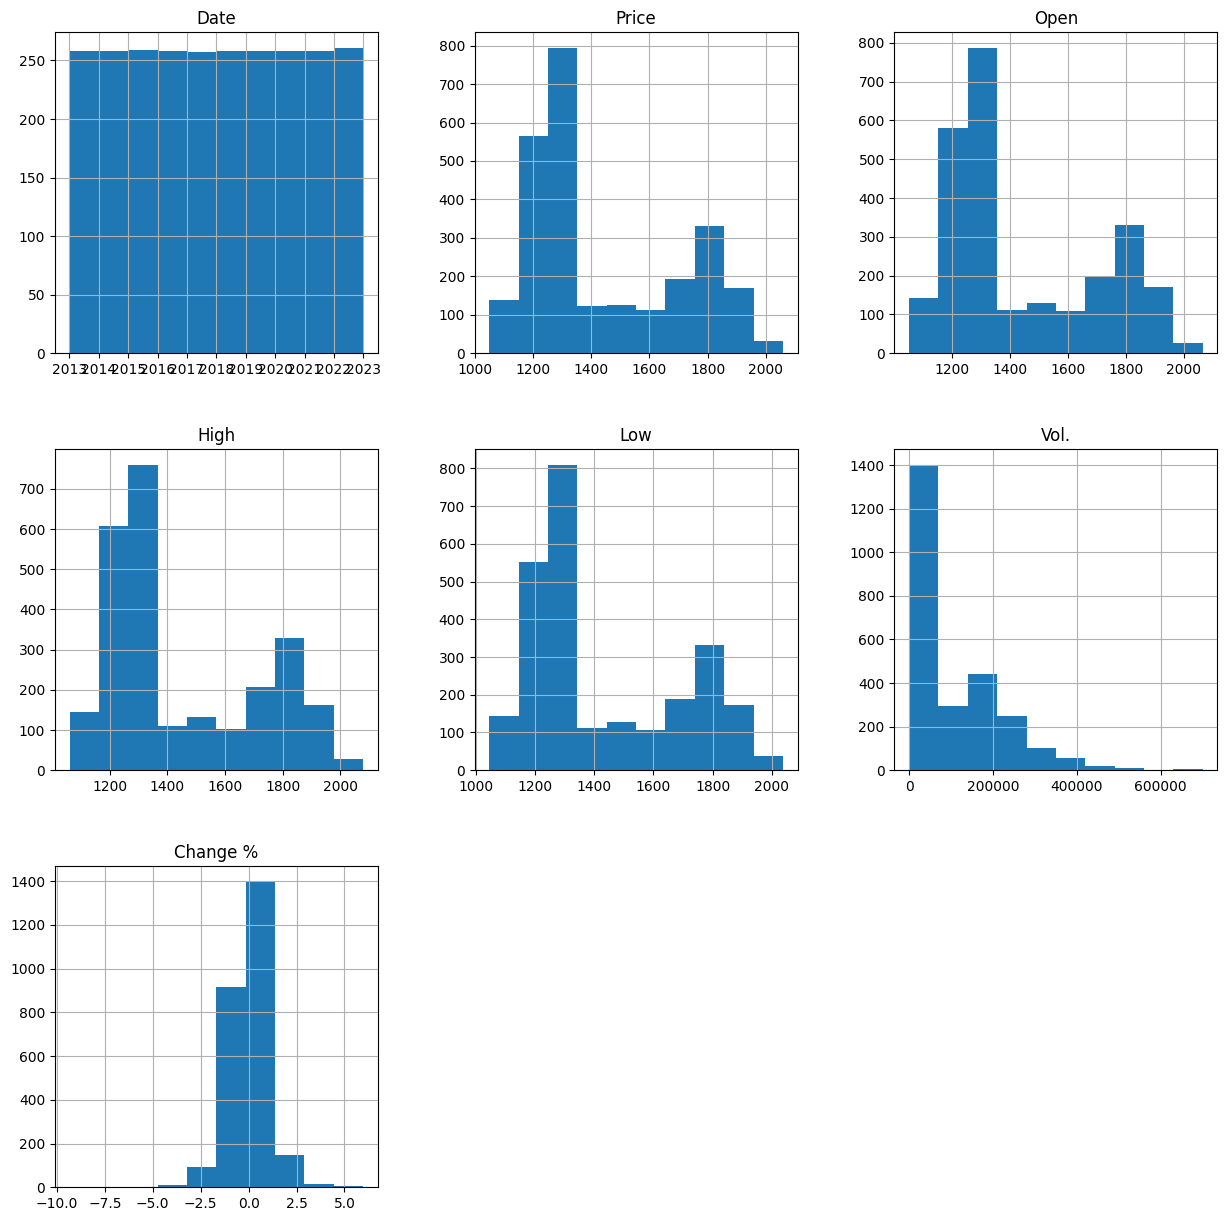

In [18]:
gold.hist(figsize=(15,15))
plt.show()

In [19]:
# Handling missing values in Vol. column by filling them with the median of the column since the data is rightly skewed
median_vol = gold['Vol.'].median()
gold['Vol.'].fillna(median_vol, inplace=True)

In [20]:
gold.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [21]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-01-02,1689.9,1675.8,1695.0,1672.1,60.0,0.78
1,2013-01-03,1675.6,1688.0,1689.3,1664.3,190.0,-0.85
2,2013-01-04,1649.9,1664.4,1664.4,1630.0,310.0,-1.53
3,2013-01-07,1647.2,1657.3,1663.8,1645.3,90.0,-0.16
4,2013-01-08,1663.2,1651.5,1662.6,1648.8,130.0,0.97


### 7. Exploratory Data Analysis

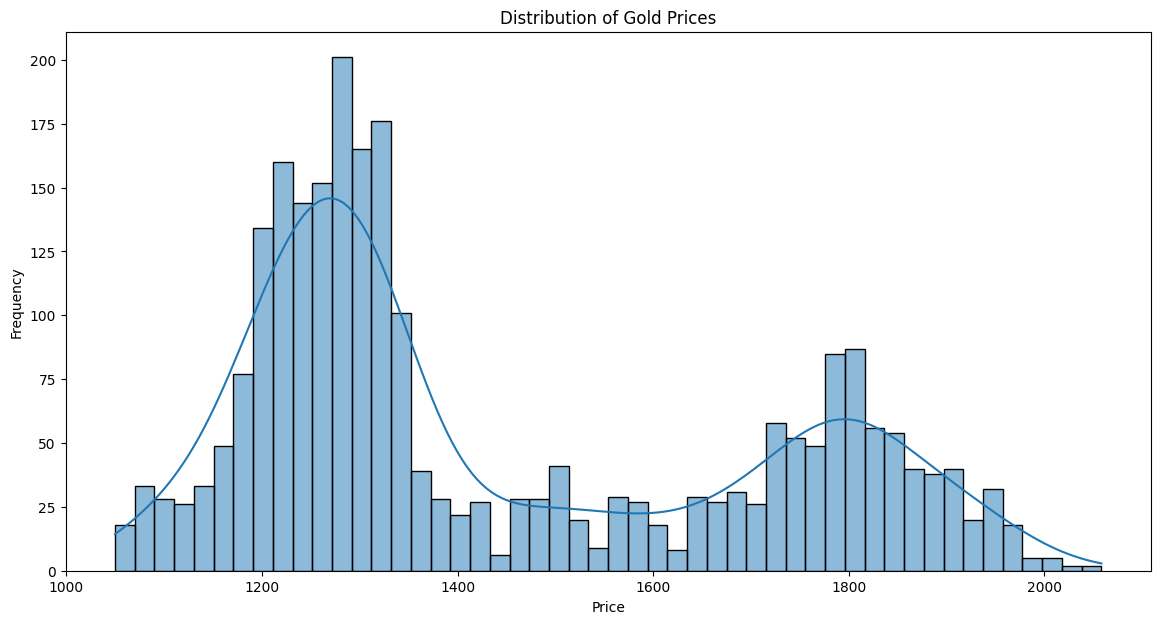

In [22]:
# Distribution plots
plt.figure(figsize=(14, 7))
sns.histplot(gold['Price'], bins=50, kde=True)
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

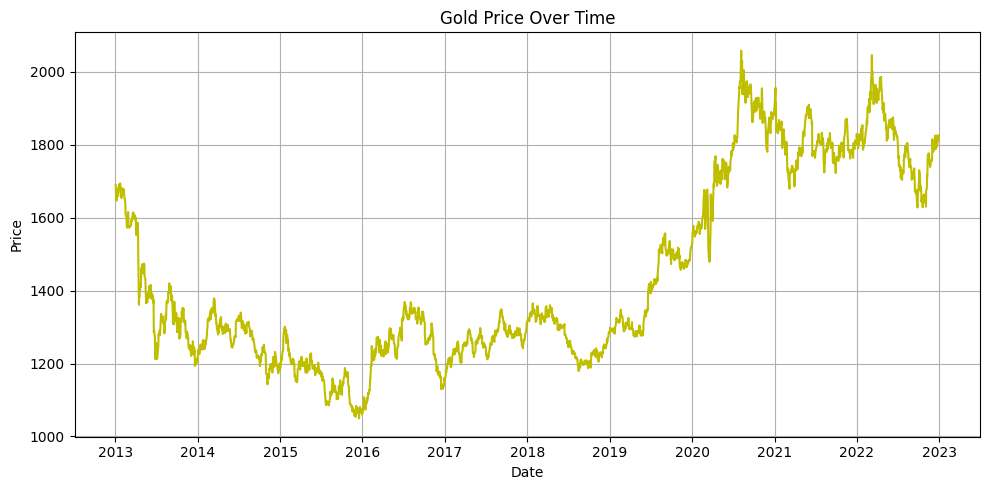

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(gold['Date'], gold['Price'], linestyle='-', color='y')

plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

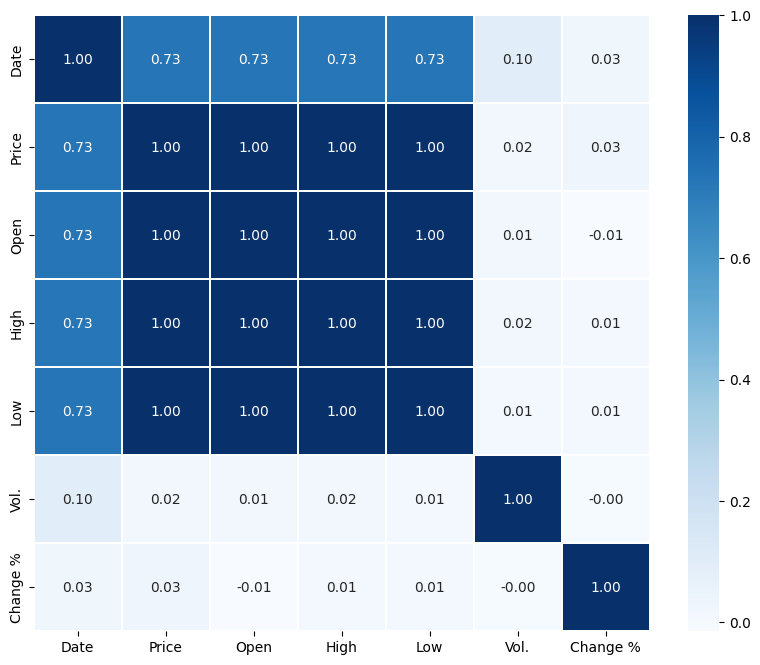

In [24]:
correlation_matrix = gold.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, cbar=True, linewidths=0.1, square=True, linecolor='white', fmt='.2f', annot=True, cmap='Blues')

The high correlation between the 'Price', 'Open', 'High' and 'Low' variables shows multicollineairty. Including these variables in the regression model can cause errors and difficulties in estimating the effect of each feature. Prinipal Component Analysis (PCA) will be performed before building the models to address this issue.

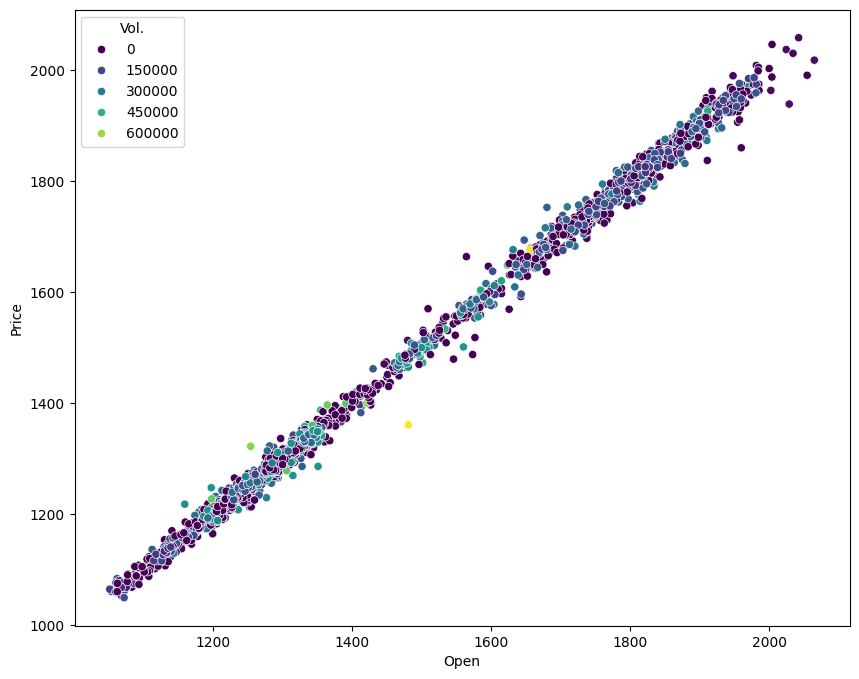

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Open', y='Price', data=gold, hue='Vol.', palette = 'viridis')
plt.show()

### 8. Feature Engineering

In [26]:
# Creating lag features to represent lagged values in the 'Price' column.
gold['Price_Lag1'] = gold['Price'].shift(1) # 1 day price lag
gold['Price_Lag2'] = gold['Price'].shift(2) # 2 days price lag

# Creating moving average features
gold['MA30'] = gold['Price'].rolling(window=30).mean() # 30 periods (days)
gold['MA90'] = gold['Price'].rolling(window=90).mean() # 90 periods (days)

gold.dropna(inplace=True)

The lag features allow the incoporation of past values of the 'Price' variable into the models to improve predictive power and the moving average features smooth out short-term fluctuations and highlight longer-term trends.

### 9. Data Preprocessing

In [27]:
# Taking the logarithm of skewed data to analyse the distribution and make it normally distributed

gold['Vol.'] = np.log(gold['Vol.'] + 1 )

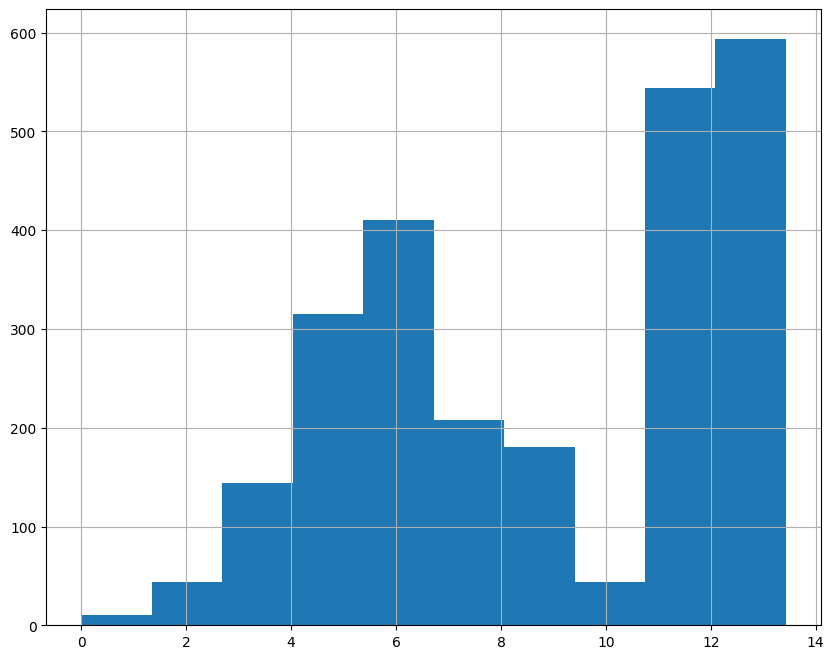

In [31]:
gold['Vol.'].hist(figsize=(10,8))
plt.show()

In [32]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Price_Lag1,Price_Lag2,MA30,MA90
89,2013-05-08,1474.3,1449.2,1474.5,1449.2,7.444833,1.72,1449.4,1468.6,1488.243333,1584.921111
90,2013-05-09,1469.1,1472.4,1475.5,1456.8,5.525453,-0.35,1474.3,1449.4,1483.640000,1582.467778
91,2013-05-10,1437.0,1455.0,1461.0,1419.4,5.916202,-2.19,1469.1,1474.3,1478.350000,1579.816667
92,2013-05-13,1434.9,1442.1,1442.1,1427.3,6.508769,-0.15,1437.0,1469.1,1472.816667,1577.427778
93,2013-05-14,1425.1,1434.3,1442.5,1421.0,5.602119,-0.68,1434.9,1437.0,1467.790000,1574.960000


### 10. Model Building

In [33]:
gold = gold.drop(columns=['Date'])

# Separating features and target variable
X = gold.drop(columns=['Price'])
y = gold['Price']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_scaled = scaler.fit_transform(X)

# Applying PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [36]:
 # Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [37]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mse, rmse, mae, r2, mape

def print_evaluation(model_name, metrics):
    mse, rmse, mae, r2, mape = metrics
    print(f'{model_name} Evaluation:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print(f'Mean Absolute Percentage Error: {mape}')


results = []

In [40]:
# Linear Regression does not have hyperparameters
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_metrics = evaluate_model(lr, X_test, y_test)
print_evaluation('Linear Regressor', lr_metrics)
results.append(('Linear Regressor', *lr_metrics))

Linear Regressor Evaluation:
Mean Squared Error: 297.97416807413947
Root Mean Squared Error: 17.2619282837735
Mean Absolute Error: 13.368510727876261
R-squared: 0.9960111189064479
Mean Absolute Percentage Error: 0.009035998031483769


In [41]:
xgb_model = xgb.XGBRegressor()
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='root_mean_squared_error')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
print("Best parameters for XGBoost:", xgb_grid.best_params_)
xgb_metrics = evaluate_model(xgb_best, X_test, y_test)
print_evaluation('XGBoost Regressor', xgb_metrics)
results.append(('XGBoost Regressor', *xgb_metrics))

Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 50}
XGBoost Regressor Evaluation:
Mean Squared Error: 283.0981530146179
Root Mean Squared Error: 16.825520883901866
Mean Absolute Error: 12.958428967309622
R-squared: 0.9962102591728738
Mean Absolute Percentage Error: 0.00880062986725433


In [42]:
# Bayesian Regression has no hyperparameters
br = BayesianRidge()
br.fit(X_train, y_train)
br_metrics = evaluate_model(br, X_test, y_test)
print_evaluation('Bayesian Regressor', br_metrics)
results.append(('Bayesian Regressor', *br_metrics))

Bayesian Regressor Evaluation:
Mean Squared Error: 297.97481101636606
Root Mean Squared Error: 17.261946906892224
Mean Absolute Error: 13.3684799263519
R-squared: 0.9960111102995941
Mean Absolute Percentage Error: 0.009035988584346247


In [43]:
# Support Vector Regressor
svr = SVR()
svr_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring='root_mean_squared_error')
svr_grid.fit(X_train, y_train)
svr_best = svr_grid.best_estimator_
print("Best parameters for SVR:", svr_grid.best_params_)
svr_metrics = evaluate_model(svr_best, X_test, y_test)
print_evaluation('Support Vector Regressor', svr_metrics)
results.append(('Support Vector Regressor', *svr_metrics))

Best parameters for SVR: {'C': 10, 'gamma': 0.01}
Support Vector Regressor Evaluation:
Mean Squared Error: 571.2645638512136
Root Mean Squared Error: 23.901141475904733
Mean Absolute Error: 17.11910509277214
R-squared: 0.9923526712637873
Mean Absolute Percentage Error: 0.011383237342924086


In [44]:
# Random Forest
rf = RandomForestRegressor()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='root_mean_squared_error')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Best parameters for Random Forest Regressor:", rf_grid.best_params_)
rf_metrics = evaluate_model(rf_best, X_test, y_test)
print_evaluation('Random Forest Regressor', rf_metrics)
results.append(('Random Forest Regressor', *rf_metrics))

Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 200}
Random Forest Regressor Evaluation:
Mean Squared Error: 296.0926293340166
Root Mean Squared Error: 17.207342308852247
Mean Absolute Error: 12.98285286223829
R-squared: 0.9960363064398363
Mean Absolute Percentage Error: 0.008821533424315416


### 11. Model Comparison

                      Model         MSE       RMSE        MAE        R2  \
0          Linear Regressor  297.974168  17.261928  13.368511  0.996011   
1         XGBoost Regressor  283.098153  16.825521  12.958429  0.996210   
2        Bayesian Regressor  297.974811  17.261947  13.368480  0.996011   
3  Support Vector Regressor  571.264564  23.901141  17.119105  0.992353   
4   Random Forest Regressor  296.092629  17.207342  12.982853  0.996036   

       MAPE  
0  0.009036  
1  0.008801  
2  0.009036  
3  0.011383  
4  0.008822  


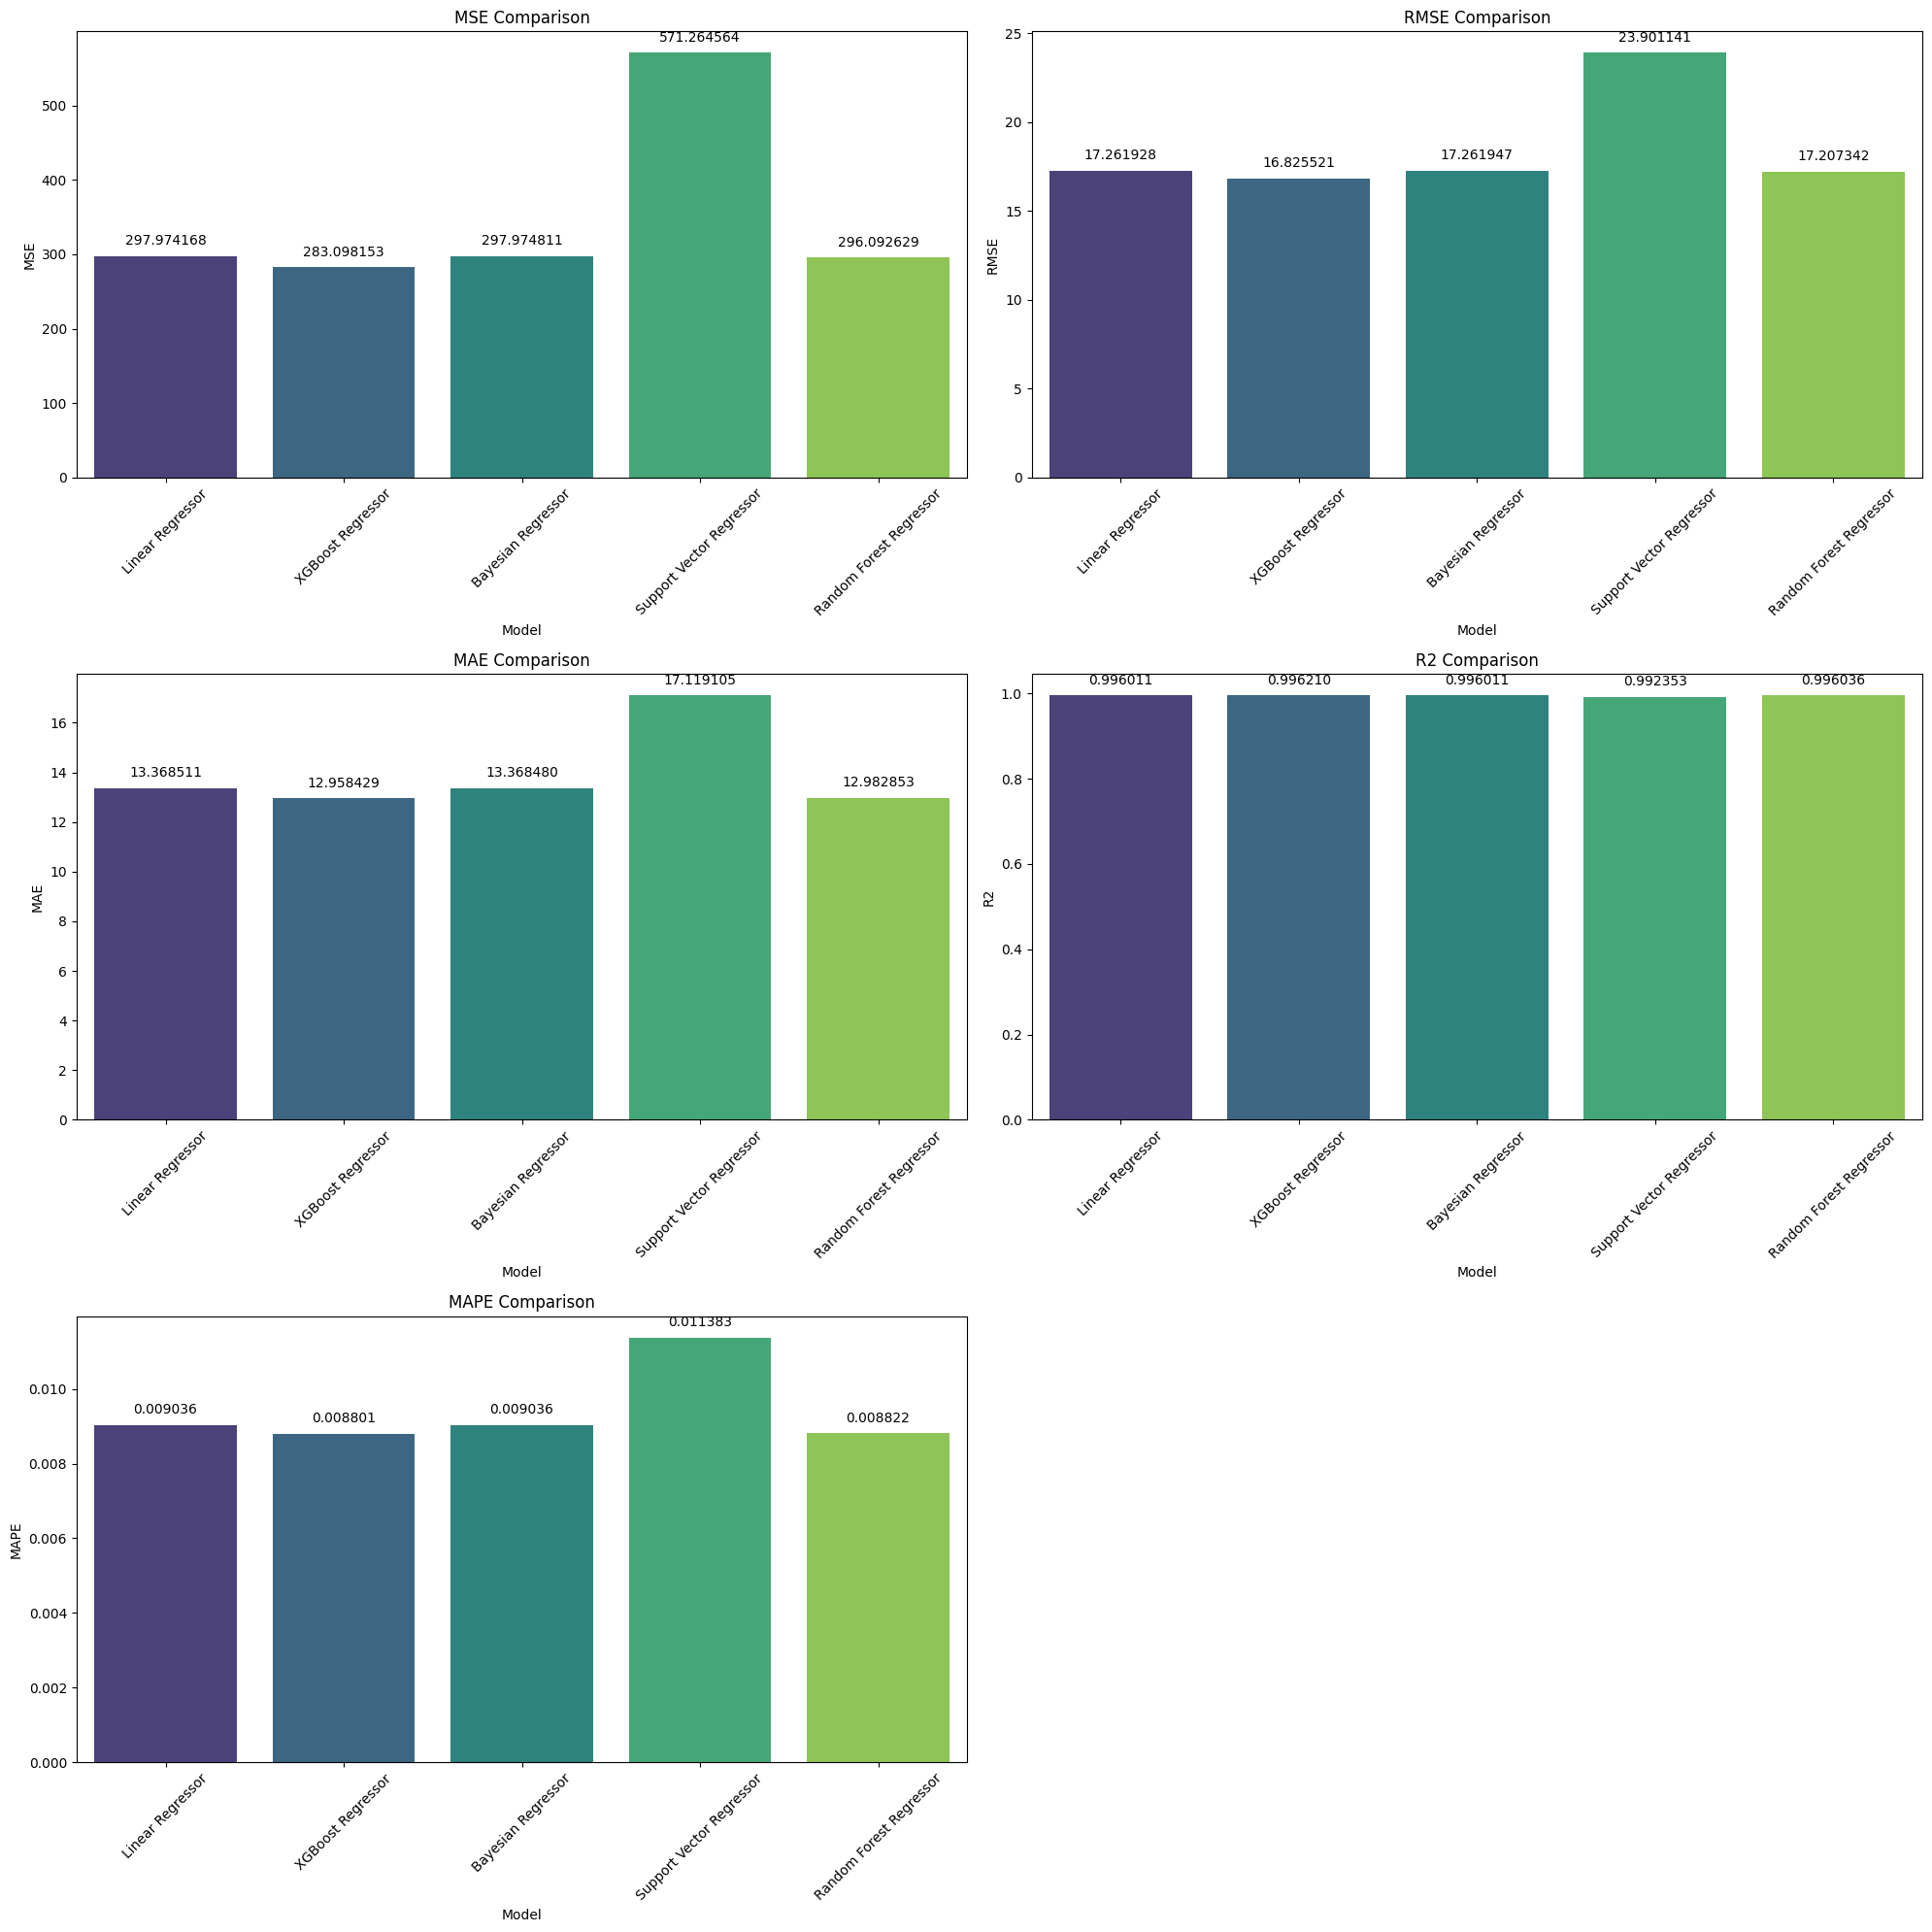

In [56]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'MAPE'])
print(results_df)

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.ravel()

metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'MAPE']

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, hue='Model', data=results_df, ax=axes[idx], palette='viridis', dodge=False, legend=False)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

    bars = axes[idx].patches
    for bar in bars:
        yval = bar.get_height()
        axes[idx].annotate(f'{yval:.6f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                           xytext=(0, 6),
                           textcoords="offset points",
                           ha='center', va='bottom')
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()


### 12. Model Validation

In [70]:
linear_predictions = lr.predict(X_test)
xgb_predictions = xgb_best.predict(X_test)
bayesian_predictions = br.predict(X_test)
svr_predictions = svr_best.predict(X_test)
rf_predictions = rf_best.predict(X_test)

In [71]:
validation_df = pd.DataFrame({
    'True Values': y_test,
    'Linear Regression Predictions': linear_predictions,
    'XGBoost Predictions': xgb_predictions,
    'Bayesian Ridge Predictions': bayesian_predictions,
    'Support Vector Regressor Predictions': svr_predictions,
    'Random Forest Predictions': rf_predictions,
})

validation_df.head(20)

,True Values,Linear Regression Predictions,XGBoost Predictions,Bayesian Ridge Predictions,Support Vector Regressor Predictions,Random Forest Predictions
2302,1762.7,1788.244328,1783.562866,1788.242895,1792.948818,1787.586984
2161,1882.3,1851.755374,1845.928711,1851.753609,1841.682317,1841.857936
1483,1191.7,1203.409990,1198.848633,1203.410848,1203.704288,1196.329125
2241,1792.4,1788.654930,1779.638672,1788.653729,1787.737255,1790.666615
1147,1268.6,1269.316839,1264.864868,1269.317385,1265.187975,1268.886160
2564,1782.4,1779.548724,1775.744019,1779.547165,1783.479105,1779.145164
1999,1895.5,1906.320631,1885.051758,1906.318586,1877.685563,1894.055573
899,1324.7,1305.033027,1303.192017,1305.033383,1300.410100,1303.405719
948,1324.9,1311.891299,1321.835083,1311.891858,1309.651357,1321.199542
2007,1928.9,1929.878203,1940.837402,1929.876005,1890.534742,1947.516084


### 13. Model Selection

In [64]:
best_model_index = results_df['RMSE'].idxmin()

best_model_name = results_df.loc[best_model_index, 'Model']
best_model_rmse = results_df.loc[best_model_index, 'RMSE']
best_model_r2 = results_df.loc[best_model_index, 'R2']

print("The best model is {} with an RMSE value of {:.4f} and R2 score of {:.4f}".format(best_model_name, best_model_rmse, best_model_r2))

The best model is XGBoost Regressor with an RMSE value of 16.8255 and R2 score of 0.9962


In [65]:
models_dict = {
    'Linear Regressor': lr,
    'XGBoost Regressor': xgb_best,
    'Bayesian Regressor': br,
    'Support Vector Regressor': svr_best,
    'Random Forest Regressor': rf_best
}

In [66]:
best_model = models_dict[best_model_name]

In [73]:
y_pred_best = best_model.predict(X_test)

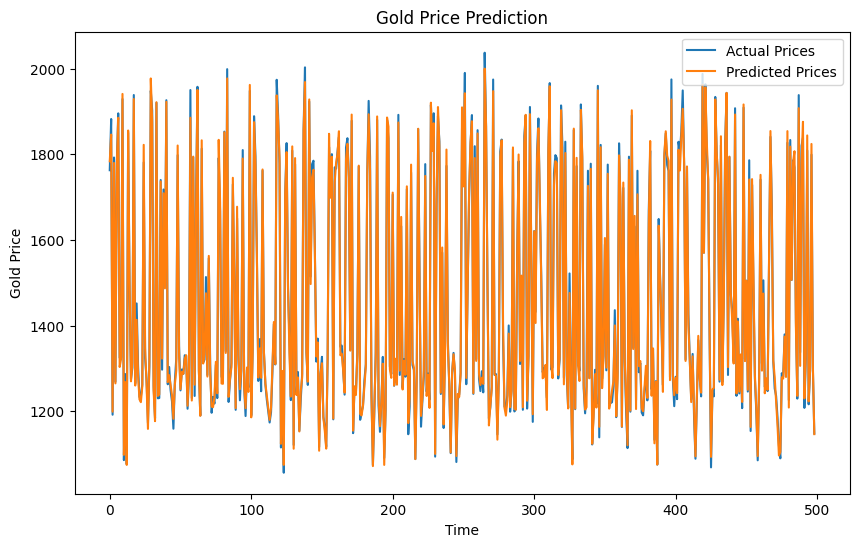

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Prices')
plt.plot(y_pred_best, label='Predicted Prices')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

### 14. Summary

There were 5 missing values in the 'Vol.' column which were filled using the median of the column since the distribution was skewed. The original dataset was split into train and test and then standardized using the Standard Scalar. Principal Component Analysis was also peformed because there was multicollinearity between the 'Price', 'Open', 'High' and 'Low' features. Lag and moving average features were created as part of feature engineering. These are used to capture past behavior and trends in the gold prices, which helps the regression model make more accurate predictions about future prices. The performances of the models were compared using the Mean Squared Error, Root Mean Squared Error(RMSE), 'Mean Absolute Error', 'R sqaured', 'Mean Absolute Percentage Error. The model with the lowest RMSE value as the “best” model because it is the one that makes predictions that are closest to the actual values from the dataset. The best model also had the highest r2 score indicating high accuracy in making predictions.

Based on the RMSE, the best performing model is the **XGBoost Regressor** with an RMSE  value of 16.8255 and R2 score of 0.9962.

[Back to Table of Contents](#3.-Table-of-Contents)